# Road Segmentation

The model is trained for the task of segmentation on satellite imagery

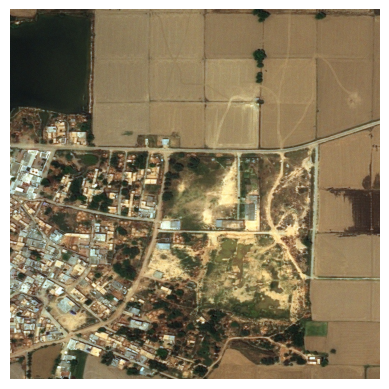

In [1]:

from PIL import Image
import matplotlib.pyplot as plt
import rasterio as rio
import numpy as np
from skimage.io import imsave

img_path = 'samples/deep_globe.jpg' # RGB
# img_path = 'samples/deep_globe.png' # RGBA
# img_path = 'samples/sentinel-2-l2a_2024-08-24.tif' 
# img_path = "samples/T31TDF_20240824T104021_RGB_10m.jp2 (1).tiff"
# img_path = 'samples/sentinel.tif'

def tif2rgb(tif_path):
	x = rio.open(tif_path).read((4,3,2)) # read RGB bands
	# x = rio.open(tif_path).read((1,2,3)) # read RGB bands
	x = np.clip(x / 4000, 0, 1) # normalize to 0-1 with increased brightness
	x = (x * 255).astype(np.uint8) # convert to uint8
	x = x.transpose(1,2,0) # convert to HWC
	# x = resize(x, (256,256))
	# x = (x * 255).astype(np.uint8) # convert to uint8
	# crop
	# x = x[-512:,-512:,:]
	print(x.shape)
	new_path = tif_path.replace('.tif', '.png')
	imsave(new_path, x)
	return new_path

# img_path = tif2rgb(img_path)

img = Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.show()

In [2]:
import requests

url = f'http://localhost:8000/'
# url  = f'https://eotdl.dev.gda.adamplatform.eu/RoadSegmentationQ2'

res = requests.get(url)

res.json()


{'message': 'Hello from the ml-inference API!',
 'version': '2025.02.26',
 'auth_required': False}

In [3]:
from IPython.display import JSON
import json

url = f'http://localhost:8000/RoadSegmentationQ2'
# url  = f'https://eotdl.dev.gda.adamplatform.eu/RoadSegmentationQ2'

headers = {	
    "X-API-Key": "123"
}

res = requests.get(url, headers=headers)

if res.status_code == 200:
   print(res.json())

In [4]:
res = requests.post(url,  files={'image': (open(img_path, 'rb'))}, headers=headers)

if res.status_code != 200:
   print(res.json())

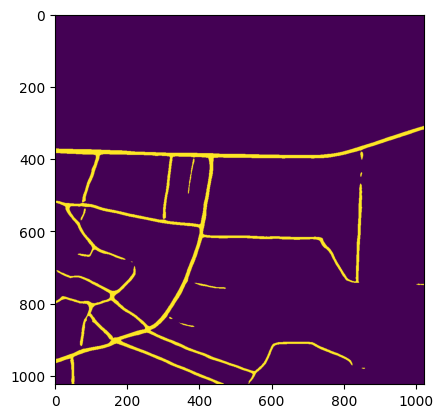

In [5]:
import numpy as np
import io 
from PIL import Image
import numpy as np 

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Assuming `response` is an image
res = requests.post(url,  files={'image': (open(img_path, 'rb'))}, headers=headers)

image_bytes = io.BytesIO(res.content)
img = Image.open(image_bytes)

logits = np.array(img) 
probas = sigmoid(logits)
mask = probas > 0.5 # use different thresholds for sensitivity analysis
# mask = img

# plt.imshow(array)
plt.imshow(mask)

# mask.shape, mask.dtype, mask.min(), mask.max()

In [6]:
logits.min(), logits.max()

(np.float32(-13.671732), np.float32(7.842674))

In [7]:
probas.min(), probas.max()

(np.float32(1.1546272e-06), np.float32(0.9996075))